In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df = pd.read_csv("c:/data/house_regress/data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [19]:
df.shape

(19740, 21)

In [20]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [21]:
X = df.loc[ : , ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount']] # 독립변수
y = df["Price"] # 종속변수

df = pd.concat([X,y], axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean") # 결측값 평균으로 채우기
df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df2

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Price
0,2.0,2.5,2.0,1.0,1.0,126.00000,196.806973,4019.0,1.054957e+06
1,2.0,2.5,2.0,1.0,1.0,202.00000,196.806973,4019.0,1.480000e+06
2,2.0,2.5,2.0,1.0,0.0,156.00000,79.000000,4019.0,1.035000e+06
3,3.0,2.5,3.0,2.0,1.0,0.00000,196.806973,4019.0,1.054957e+06
4,3.0,2.5,3.0,2.0,0.0,134.00000,150.000000,4019.0,1.465000e+06
...,...,...,...,...,...,...,...,...,...
19735,2.0,4.6,3.0,1.0,1.0,583.91709,585.000000,4380.0,5.600000e+05
19736,3.0,25.5,3.0,2.0,2.0,583.91709,333.000000,2940.0,5.253000e+05
19737,2.0,6.3,3.0,2.0,2.0,1999.00000,199.000000,6543.0,7.500000e+05
19738,6.0,6.3,3.0,2.0,1.0,2011.00000,238.000000,6543.0,2.450000e+06


In [22]:
cols = df2.columns[:-1]
X = df2[cols]
y = df2["Price"]

In [23]:
import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()

print("회귀계수: \n", result.params)
print("R-squared: \n", result.rsquared)
print("P values: \n", result.pvalues)

회귀계수: 
 Rooms            294371.005153
Distance         -23496.988924
Bedroom2           9619.034190
Bathroom         153450.013874
Car               45814.483818
Landsize              0.670134
BuildingArea         19.118400
Propertycount         7.495786
dtype: float64
R-squared: 
 0.8320357616277432
P values: 
 Rooms             0.000000e+00
Distance         3.070252e-284
Bedroom2          1.150098e-01
Bathroom         1.468789e-106
Car               2.508850e-24
Landsize          5.287350e-01
BuildingArea      4.347287e-02
Propertycount     8.631029e-27
dtype: float64


In [24]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                          1.222e+04
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        11:43:04   Log-Likelihood:                     -2.8670e+05
No. Observations:               19740   AIC:                                  5.734e+05
Df Residuals:                   19732   BIC:                                  5.735e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [25]:
# Landsize 제거

X = df2.loc[ : , ['Rooms', 'Price', 'Car', 'Distance', 'Bedroom2', 'Bathroom', 'BuildingArea', 'Propertycount']]
y = df2["Price"]

model = sm.OLS(y, X)
result = model.fit()

print("회귀계수: \n", result.params)
print("R-squared: \n", result.rsquared)
print("P values: \n", result.pvalues)

회귀계수: 
 Rooms           -6.493792e-10
Price            1.000000e+00
Car             -2.910383e-11
Distance         4.365575e-11
Bedroom2         7.639755e-11
Bathroom        -6.548362e-11
BuildingArea    -9.947598e-14
Propertycount   -1.776357e-15
dtype: float64
R-squared: 
 1.0
P values: 
 Rooms            0.000000e+00
Price            0.000000e+00
Car              7.655881e-06
Distance         0.000000e+00
Bedroom2         4.369703e-18
Bathroom         1.158624e-10
BuildingArea     3.395286e-13
Propertycount    7.877546e-02
dtype: float64


In [26]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.056e+33
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        11:43:16   Log-Likelihood:                      3.8786e+05
No. Observations:               19740   AIC:                                 -7.757e+05
Df Residuals:                   19732   BIC:                                 -7.756e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
model = LinearRegression().fit(X_train, y_train)

In [28]:
print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  1.0
검증용:  1.0


In [29]:
# 다중공선성 확인
df2.corr()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Price
Rooms,1.000000,0.269187,0.713647,0.465050,0.315823,0.027690,0.063147,-0.092805,0.441892
Distance,0.269187,1.000000,0.198491,0.082878,0.191013,0.041062,0.059510,-0.075737,-0.130879
Bedroom2,0.713647,0.198491,1.000000,0.595986,0.389490,0.023069,0.080291,-0.079796,0.335809
Bathroom,0.465050,0.082878,0.595986,1.000000,0.320351,0.032138,0.066778,-0.041444,0.325379
Car,0.315823,0.191013,0.389490,0.320351,1.000000,0.025044,0.066859,-0.024810,0.177339
Landsize,0.027690,0.041062,0.023069,0.032138,0.025044,1.000000,0.016474,0.011601,0.010406
BuildingArea,0.063147,0.059510,0.080291,0.066778,0.066859,0.016474,1.000000,-0.009088,0.028060
Propertycount,-0.092805,-0.075737,-0.079796,-0.041444,-0.024810,0.011601,-0.009088,1.000000,-0.043741
Price,0.441892,-0.130879,0.335809,0.325379,0.177339,0.010406,0.028060,-0.043741,1.000000


In [ ]:
# OLS() 최소자승법 - summary()가 설명력이 좋음
# LinearRegression() - 정확도 제공

In [30]:
import pandas as pd

df = pd.read_csv("c:/data/degree/data.csv")
df.head()

,year,month,value
0,1920,1,40.6
1,1920,2,40.8
2,1920,3,44.4
3,1920,4,46.7
4,1920,5,54.1


<AxesSubplot:title={'center':'value'}, xlabel='month'>

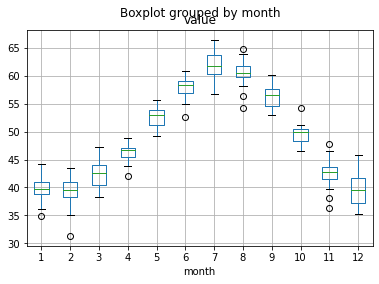

In [31]:
%matplotlib inline
df.boxplot("value", "month")

In [32]:
import statsmodels.api as sm

# 범주형 독립변수는 C()로 카테고리화 하기
model = sm.OLS.from_formula("value ~ C(month)+0", df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          2.96e-125
Time:                        12:00:25   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]     39.6950      0.518     76.691      0.000      38.675      40.715
C(month)[2]     39.1900      0.518     75.716      0.000      38.170      40.210
C(month)[3]     42.1950      0.518     81.521      0.000      41.175      43.215
C(month)[4]     46.2900      0.518     89.433      0.000      45.270      47.310
C(month)[5]     52.5600      0.518    101.547      0.000      51.540      53.580
C(month)[6]     58.0400      0.518    112.134      0.000      57.020      59.060
C(month)[7]     61.9000      0.518    119.592      0.000      60.880      62.920
C(month)[8]     60.5200      0.518    116.926      0.000      59.500      61.540
C(month)[9]     56.4800      0.518    109.120      0.000      55.460      57.500
C(month)[10]    49.4950      0.518     95.625      0.000      48.475      50.515
C(month)[11]    42.5800      0.518     82.265      0.000      41.560      43.600
C(month)[12]    39.5300      0.518     76.373      0.000      38.510      40.550
==============================================================================
Omnibus:                        5.430   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.299
Skew:                          -0.281   Prob(JB):                       0.0707
Kurtosis:                       3.463   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# +0 없으면 2월부터

model = sm.OLS.from_formula("value ~ C(month)", df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          2.96e-125
Time:                        12:01:05   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.691      0.000      38.675      40.715
C(month)[T.2]     -0.5050      0.732     -0.690      0.491      -1.947       0.937
C(month)[T.3]      2.5000      0.732      3.415      0.001       1.058       3.942
C(month)[T.4]      6.5950      0.732      9.010      0.000       5.153       8.037
C(month)[T.5]     12.8650      0.732     17.575      0.000      11.423      14.307
C(month)[T.6]     18.3450      0.732     25.062      0.000      16.903      19.787
C(month)[T.7]     22.2050      0.732     30.335      0.000      20.763      23.647
C(month)[T.8]     20.8250      0.732     28.450      0.000      19.383      22.267
C(month)[T.9]     16.7850      0.732     22.931      0.000      15.343      18.227
C(month)[T.10]     9.8000      0.732     13.388      0.000       8.358      11.242
C(month)[T.11]     2.8850      0.732      3.941      0.000       1.443       4.327
C(month)[T.12]    -0.1650      0.732     -0.225      0.822      -1.607       1.277
==============================================================================
Omnibus:                        5.430   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.299
Skew:                          -0.281   Prob(JB):                       0.0707
Kurtosis:                       3.463   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 부분회귀 플롯

In [34]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [35]:
import statsmodels.api as sm

model = sm.OLS(dfy, dfX)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        12:09:35   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='AGE', ylabel='MEDV'>

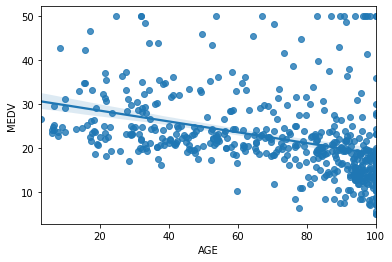

In [36]:
%matplotlib inline
import seaborn as sns

sns.regplot(x="AGE", y="MEDV", data=df)

# 음의 상관관계인 것 처럼 보이지만 사실 다른 요소들도 포함되어 있는 것이기 때문에 사실이 아님

In [37]:
others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
others

['NOX',
 'RM',
 'ZN',
 'CRIM',
 'DIS',
 'B',
 'INDUS',
 'CHAS',
 'RAD',
 'LSTAT',
 'TAX',
 'PTRATIO']

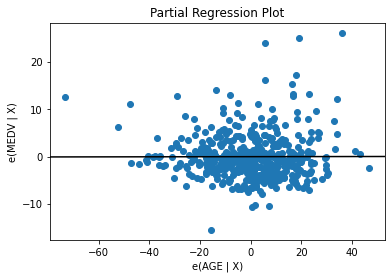

In [38]:
from statsmodels.graphics.regressionplots import plot_partregress
import matplotlib.pyplot as plt

# 다른 요소들 제외하고 age와 medv의 상관관계를 보면 아무 관계도 없음을 알 수 있다
plot_partregress("MEDV", "AGE", others, data=df, obs_labels=False)
plt.show()

[]

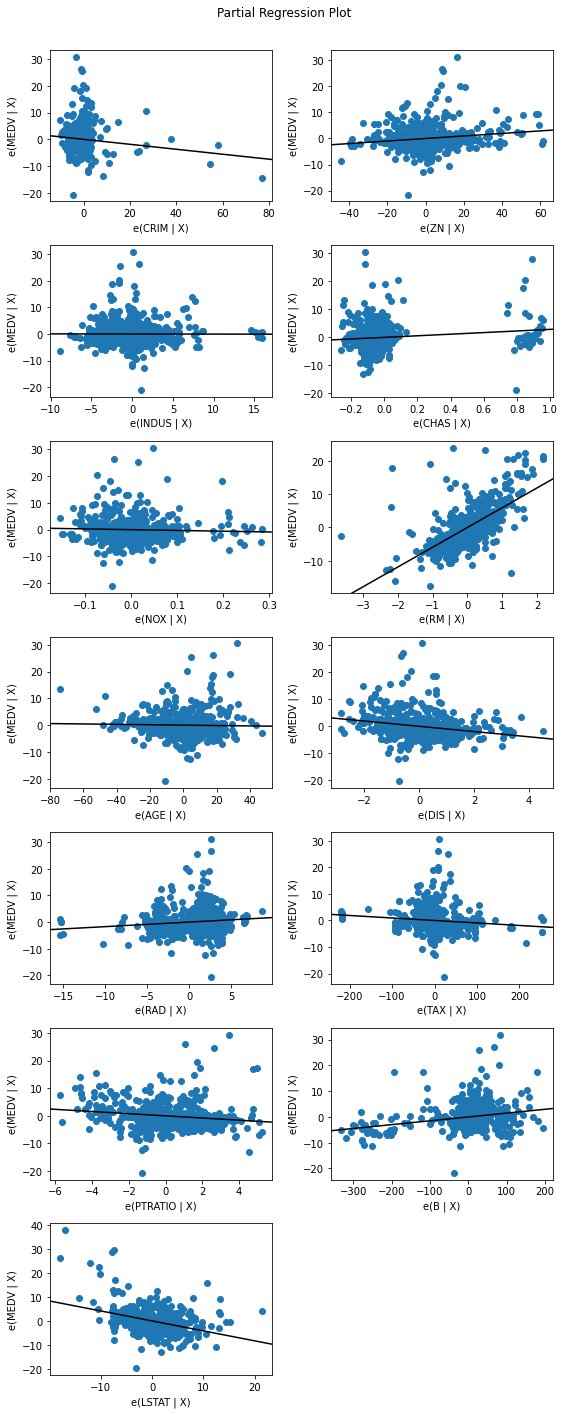

In [39]:
from statsmodels.graphics.regressionplots import plot_partregress_grid

# 전체 데이터에 대해 한번에 부분회귀 플롯을 그리는 함수 plot_partregress_grid()
fig = plt.figure(figsize=(8, 20))
plot_partregress_grid(result, fig=fig)
plt.plot()

In [40]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv("c:/data/insurance/insurance2.csv")
data.corr()['charges'].sort_values()

southwest   -0.043210
northwest   -0.039905
northeast    0.006349
sex          0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

In [42]:
# 다중 회귀분석

df = data.iloc[:, [0,2,3]]
df.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [43]:
y = data.iloc[:, [9]]
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [52]:
model = sm.OLS(y, df)
result = model.fit()

print("회귀계수: \n", result.params)
print("R-squared: \n", result.rsquared)
print("P values: \n", result.pvalues)

회귀계수: 
 age         205.509604
bmi         162.508428
children    407.682683
dtype: float64
R-squared: 
 0.5957184482734048
P values: 
 age         1.202690e-22
bmi         8.153462e-09
children    1.133688e-01
dtype: float64


In [53]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.595
Method:                 Least Squares   F-statistic:                              655.7
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                   6.52e-262
Time:                        12:42:15   Log-Likelihood:                         -14400.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1335   BIC:                                  2.882e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [54]:
df2 = data.iloc[:, [0,2]]
y2 = data.iloc[:, [9]]

model2 = sm.OLS(y2, df2)
result2 = model2.fit()

print("회귀계수: \n", result2.params)
print("R-squared: \n", result2.rsquared)
print("P values: \n", result2.pvalues)

회귀계수: 
 age    208.863249
bmi    172.394322
dtype: float64
R-squared: 
 0.5949583640125078
P values: 
 age    1.634082e-23
bmi    3.773924e-10
dtype: float64


In [55]:
print(result2.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.594
Method:                 Least Squares   F-statistic:                              981.2
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                   6.45e-263
Time:                        12:42:31   Log-Likelihood:                         -14401.
No. Observations:                1338   AIC:                                  2.881e+04
Df Residuals:                    1336   BIC:                                  2.882e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# 레버리지와 이상치

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import statsmodels.api as sm

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=1)

In [2]:
data_100 = (4, 300)
data_101 = (3, 150)

X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])

X = sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])

In [3]:
X[:5]

array([[ 1.        , -0.61175641],
       [ 1.        , -0.24937038],
       [ 1.        ,  0.48851815],
       [ 1.        ,  0.76201118],
       [ 1.        ,  1.51981682]])

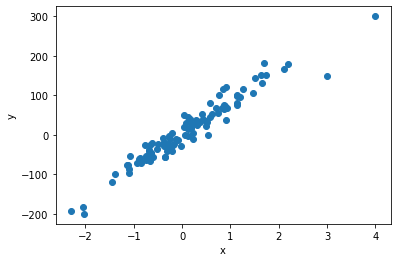

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
import pandas as pd

model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.61e-61
Time:                        13:04:19   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.118      -0.840       7.353
1             78.3379      2.048     38.260      0.000      74.276      82.400
==============================================================================
Omnibus:                       16.191   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.807
Skew:                          -0.534   Prob(JB):                     1.02e-08
Kurtosis:                       5.742   Cond. No.                         1.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

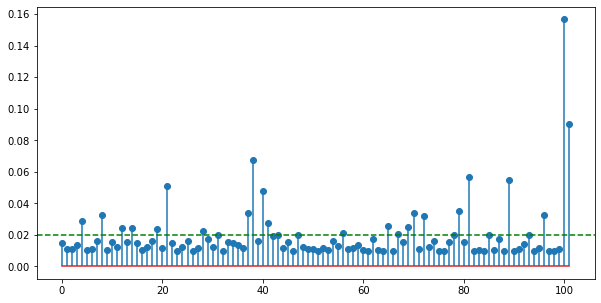

In [6]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10,5))
plt.stem(hat)
plt.axhline(0.02, c="g", ls="--")
plt.show()

In [7]:
hat.sum()

2.0000000000000004

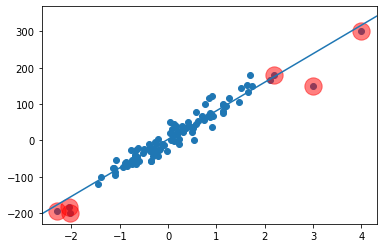

In [8]:
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.show()

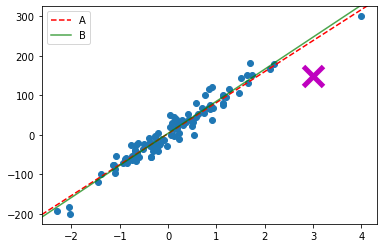

In [9]:
model2 = sm.OLS(y[:-1], X[:-1]) # 마지막 샘플 제외
result2 = model2.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, c="r", linestyle="--", ax=ax, label='A') # 마지막 샘플 포함
sm.graphics.abline_plot(model_results=result2, c="g", alpha=0.7, ax=ax, label='B') # 마지막 샘플 제외

plt.plot(X0[-1], y[-1], marker='x', c='m', ms=20, mew=5)
plt.legend()
plt.show()

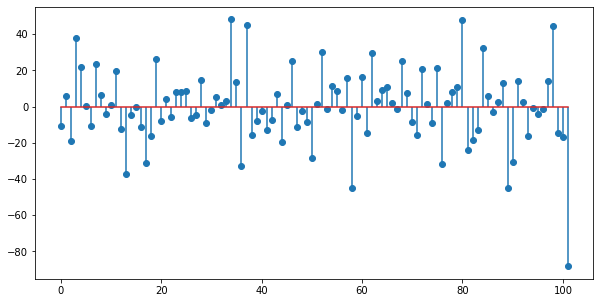

In [10]:
plt.figure(figsize=(10, 5))
plt.stem(result.resid)
plt.show()

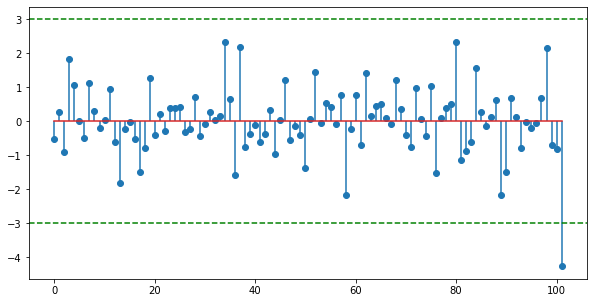

In [11]:
plt.figure(figsize=(10, 5))
plt.stem(result.resid_pearson)
plt.axhline(3, c='g', ls='--')
plt.axhline(-3, c='g', ls='--')
plt.show()

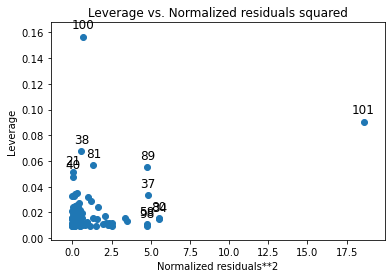

In [13]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

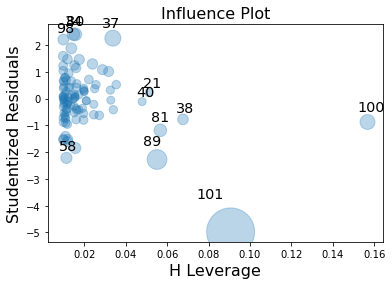

In [14]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

In [17]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [18]:
model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
print(result_boston.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          6.72e-135
Time:                        13:11:54   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

<AxesSubplot:>

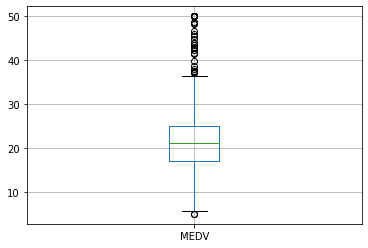

In [19]:
dfy.boxplot()

In [20]:
dfy.loc[dfy.MEDV >= 40, 'MEDV'] = 40
model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
result_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          2.23e-153
Time:                        13:12:53   Log-Likelihood:                -1385.7
No. Observations:                 506   AIC:                             2799.
Df Residuals:                     492   BIC:                             2859.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1624      4.081      9.350      0.000      30.143      46.182
CRIM          -0.1109      0.026     -4.219      0.000      -0.163      -0.059
ZN             0.0370      0.011      3.374      0.001       0.015       0.059
INDUS         -0.0139      0.049     -0.283      0.777      -0.111       0.083
CHAS           1.7865      0.689      2.593      0.010       0.433       3.140
NOX          -15.4649      3.055     -5.062      0.000     -21.467      -9.463
RM             2.8793      0.334      8.615      0.000       2.223       3.536
AGE           -0.0060      0.011     -0.567      0.571      -0.027       0.015
DIS           -1.2519      0.160     -7.848      0.000      -1.565      -0.938
RAD            0.2704      0.053      5.096      0.000       0.166       0.375
TAX           -0.0116      0.003     -3.867      0.000      -0.018      -0.006
PTRATIO       -0.8203      0.105     -7.840      0.000      -1.026      -0.615
B              0.0083      0.002      3.843      0.000       0.004       0.012
LSTAT         -0.4797      0.041    -11.828      0.000      -0.559      -0.400
==============================================================================
Omnibus:                       93.466   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.094
Skew:                           0.971   Prob(JB):                     2.39e-46
Kurtosis:                       5.488   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
idx = np.where(dfy >= 40)[0] # 40 이상인 값들의 인덱스
idx

array([ 98, 157, 161, 162, 163, 166, 186, 195, 202, 203, 204, 224, 225,
       228, 232, 233, 253, 256, 257, 261, 262, 267, 268, 280, 282, 283,
       368, 369, 370, 371, 372], dtype=int64)

In [22]:
idx2 = list(set(range(len(dfX))).difference(idx))

dfX = dfX.iloc[idx2, :].reset_index(drop=True) # 빠진 인덱스들 때문에 인덱스 번호 리셋해줌
dfy = dfy.iloc[idx2, :].reset_index(drop=True)

model_boston3 = sm.OLS(dfy, dfX)
result_boston3 = model_boston3.fit()

print(result_boston3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     119.1
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          3.90e-138
Time:                        13:14:25   Log-Likelihood:                -1234.3
No. Observations:                 475   AIC:                             2497.
Df Residuals:                     461   BIC:                             2555.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.2701      3.718     10.293      0.0

In [ ]:
# 신용카드 거래 금액 예측

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


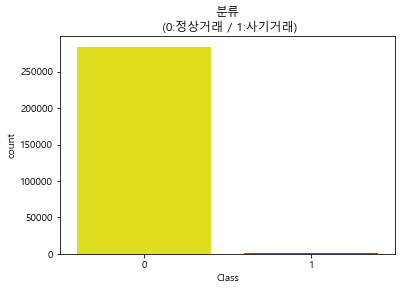

In [24]:
df = pd.read_csv("c:/data/creditcard/creditcard.csv")

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

colors = ["yellow", "red"]

sns.countplot('Class', data=df, palette=colors)
plt.title('분류\n (0:정상거래 / 1:사기거래)', fontsize=12)
plt.show()

In [25]:
print("사기거래: ", df.Amount[df.Class == 1].describe())
print()
print("정상거래: ", df.Amount[df.Class == 0].describe())

사기거래:  count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

정상거래:  count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [26]:
train_cols = df.columns[1:29]
print(train_cols)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')


In [33]:
X = df[train_cols]
y = df["Amount"]

print(X.head())
print(y.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V19       V20       V21       V22  \
0  0.098698  0.363787  0.090794  ...  0.403993  0.251412 -0.018307  0.277838   
1  0.085102 -0.255425 -0.166974  ... -0.145783 -0.069083 -0.225775 -0.638672   
2  0.247676 -1.514654  0.207643  ... -2.261857  0.524980  0.247998  0.771679   
3  0.377436 -1.387024 -0.054952  ... -1.232622 -0.208038 -0.108300  0.005274   
4 -0.270533  0.817739  0.753074  ...  0.803487  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  
0 -0

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [39]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
result = model.fit()

print("회귀계수: \n", result.params)
print("R-squared: \n", result.rsquared)
print("P values: \n", result.pvalues)

회귀계수: 
 V1     -29.071163
V2     -80.740965
V3     -34.990065
V4      17.634759
V5     -70.401473
V6      40.960005
V7      80.872687
V8     -21.747735
V9      -9.858902
V10    -23.512566
V11     -0.032073
V12     -2.442332
V13      1.471566
V14      8.686637
V15     -0.765415
V16     -0.958718
V17      1.750542
V18     10.561197
V19    -17.228021
V20    109.111737
V21     36.131645
V22    -22.338471
V23    -45.934831
V24      2.164762
V25    -22.725643
V26     -1.270434
V27     19.827197
V28      7.125640
dtype: float64
R-squared: 
 0.8140433994103969
P values: 
 V1      0.000000e+00
V2      0.000000e+00
V3      0.000000e+00
V4      0.000000e+00
V5      0.000000e+00
V6      0.000000e+00
V7      0.000000e+00
V8      0.000000e+00
V9      0.000000e+00
V10     0.000000e+00
V11     8.908527e-01
V12     1.411787e-24
V13     8.025868e-10
V14    1.903362e-265
V15     3.279689e-03
V16     4.377964e-04
V17     4.152944e-10
V18    3.816983e-301
V19     0.000000e+00
V20     0.000000e+00
V21     0

In [40]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Amount   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                          3.562e+04
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        14:56:01   Log-Likelihood:                     -1.4021e+06
No. Observations:              227845   AIC:                                  2.804e+06
Df Residuals:                  227817   BIC:                                  2.805e+06
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [41]:
from sklearn.metrics import r2_score

pred = result.predict(X_test)
r2_score(y_test, pred)

0.800011929991444

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  0.9166679569637542
검증용:  0.9202403809857429


In [43]:
from scipy import stats

In [44]:
df = pd.read_csv("c:/data/hdi/hdi_data2.csv")
train_cols = df.columns[0:5]
X = df[train_cols]
y = df["HDI"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = sm.OLS(y_train, X_train)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    HDI   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.722e+04
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                   5.06e-198
Time:                        15:05:23   Log-Likelihood:                          320.29
No. Observations:                 149   AIC:                                     -630.6
Df Residuals:                     144   BIC:                                     -615.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Life expectancy at birth        0.0047      0.000     19.852      0.000       0.004       0.005
Mean years of schooling         0.0221      0.001     15.040      0.000       0.019       0.025
Expected years of schooling     0.0115      0.002      6.825      0.000       0.008       0.015
GNI                          2.847e-06   2.04e-07     13.957      0.000    2.44e-06    3.25e-06
Export                         -0.0001   8.86e-05     -1.444      0.151      -0.000    4.72e-05
==============================================================================
Omnibus:                       43.417   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.013
Skew:                          -1.241   Prob(JB):                     8.59e-22
Kurtosis:                       6.076   Cond. No.                     1.70e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
pred = result.predict(X_test)
rsquared = r2_score(y_test, pred)
rsquared

0.9258621508415218

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [50]:
print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  0.9795845422991336
검증용:  0.9432099785667012


In [52]:
df = pd.read_csv("c:/data/energy/energy_data.csv")

train_cols = df.columns[0:8]
X = df[train_cols]
y = df["Y1"]

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     Y1   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              7347.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:19:33   Log-Likelihood:                         -1922.2
No. Observations:                 768   AIC:                                      3858.
Df Residuals:                     761   BIC:                                      3891.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1           -20.0442      1.806    -11.101      0.000     -23.589     -16.500
X2            -0.0037      0.001     -2.912      0.004      -0.006      -0.001
X3             0.0322      0.004      8.497      0.000       0.025       0.040
X4            -0.0179      0.002     -7.352      0.000      -0.023      -0.013
X5             5.2968      0.224     23.627      0.000       4.857       5.737
X6            -0.0160      0.096     -0.167      0.867      -0.204       0.172
X7            19.9608      0.824     24.231      0.000      18.344      21.578
X8             0.2063      0.071      2.916      0.004       0.067       0.345
==============================================================================
Omnibus:                       13.549   Durbin-Watson:                   0.608
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.976
Skew:                          -0.005   Prob(JB):                     6.22e-06
Kurtosis:                       3.866   Cond. No.                     3.22e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.39e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
model = LinearRegression().fit(X_train, y_train)
print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  0.9123488471973692
검증용:  0.9313289941747572


In [56]:
train_cols = df.columns[[0,1,2,3,4,6,7]]
X = df[train_cols]
y = df["Y1"]

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     Y1   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              8582.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:32:26   Log-Likelihood:                         -1922.2
No. Observations:                 768   AIC:                                      3856.
Df Residuals:                     762   BIC:                                      3884.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1           -20.0741      1.796    -11.180      0.000     -23.599     -16.549
X2            -0.0037      0.001     -2.997      0.003      -0.006      -0.001
X3             0.0322      0.004      8.503      0.000       0.025       0.040
X4            -0.0180      0.002     -7.375      0.000      -0.023      -0.013
X5             5.2960      0.224     23.643      0.000       4.856       5.736
X7            19.9608      0.823     24.246      0.000      18.345      21.577
X8             0.2063      0.071      2.917      0.004       0.067       0.345
==============================================================================
Omnibus:                       13.560   Durbin-Watson:                   0.608
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.003
Skew:                          -0.005   Prob(JB):                     6.14e-06
Kurtosis:                       3.866   Cond. No.                     3.22e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.4e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
train_cols = df.columns[0:8]
X = df[train_cols]
y = df["Y2"]

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     Y2   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              7132.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:39:39   Log-Likelihood:                         -1990.2
No. Observations:                 768   AIC:                                      3994.
Df Residuals:                     761   BIC:                                      4027.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1           -19.0135      1.973     -9.638      0.000     -22.886     -15.141
X2             0.0021      0.001      1.522      0.128      -0.001       0.005
X3             0.0180      0.004      4.343      0.000       0.010       0.026
X4            -0.0079      0.003     -2.977      0.003      -0.013      -0.003
X5             5.5881      0.245     22.812      0.000       5.107       6.069
X6             0.1299      0.105      1.241      0.215      -0.076       0.335
X7            14.7496      0.900     16.386      0.000      12.983      16.517
X8             0.0436      0.077      0.564      0.573      -0.108       0.195
==============================================================================
Omnibus:                       77.438   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.254
Skew:                           0.596   Prob(JB):                     2.15e-36
Kurtosis:                       4.927   Cond. No.                     3.22e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.39e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
model = LinearRegression().fit(X_train, y_train)
print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  0.8824724641607591
검증용:  0.907978623553135


In [61]:
df = pd.read_csv("c:/data/rides/rides.csv")
df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,yes,0,114.648259,87,73,60,89,47
1,yes,2,27.014097,87,78,76,87,65
2,no,1,63.300975,85,80,70,88,61
3,yes,0,25.909931,88,72,66,89,37
4,no,4,54.718307,84,87,74,87,68


In [62]:
df2 = pd.get_dummies(df['weekend'], prefix='weekend')
df = pd.concat([df, df2], axis=1)
del df['weekend']
df.head()

,num.child,distance,rides,games,wait,clean,overall,weekend_no,weekend_yes
0,0,114.648259,87,73,60,89,47,0,1
1,2,27.014097,87,78,76,87,65,0,1
2,1,63.300975,85,80,70,88,61,1,0
3,0,25.909931,88,72,66,89,37,0,1
4,4,54.718307,84,87,74,87,68,1,0


In [63]:
X = df[['num.child', 'distance', 'rides', 'games', 'wait', 'clean', 'weekend_no', 'weekend_yes']]
y = df['overall']

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     151.6
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.73e-118
Time:                        15:55:26   Log-Likelihood:                -1804.1
No. Observations:                 500   AIC:                             3624.
Df Residuals:                     492   BIC:                             3658.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
num.child       3.6160      0.270     13.403      0.000       3.086       4.146
distance        0.0449      0.012      3.686      0.000       0.021       0.069
rides           0.6136      0.121      5.072      0.000       0.376       0.851
games           0.1383      0.059      2.356      0.019       0.023       0.254
wait            0.5648      0.041     13.896      0.000       0.485       0.645
clean           0.9272      0.136      6.821      0.000       0.660       1.194
weekend_no   -140.6125      7.154    -19.655      0.000    -154.669    -126.556
weekend_yes  -141.3283      7.121    -19.847      0.000    -155.319    -127.337
==============================================================================
Omnibus:                        2.188   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                1.943
Skew:                          -0.050   Prob(JB):                        0.379
Kurtosis:                       2.712   Cond. No.                     4.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
result.predict([2, 20, 80, 70, 80, 90, 0, 1])

array([54.20768166])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
model = LinearRegression().fit(X_train, y_train)
print("학습: ", model.score(X_train, y_train))
print("검증: ", model.score(X_test, y_test))

학습:  0.6670609590984946
검증:  0.7212343349658579


In [66]:
model.predict([[3, 10, 80, 70, 80, 90, 1, 0]])

# sklearn으로 만든 모형은 2차원 배열로 써야 함

array([57.97589809])

In [68]:
import joblib

joblib.dump(model, 'c:/data/rides/rides_regress.model')

['c:/data/rides/rides_regress.model']

In [69]:
model = joblib.load('c:/data/rides/rides_regress.model')

model.predict([[2, 20, 80, 70, 80, 90, 0, 1]])

array([53.30062057])